In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sympy import *

In [82]:
dadosAcoTemp = pd.read_csv("açoTemp.csv",sep=";")
Area_0 = 48.3982 #mm2
diâmetro = 7.85 #mm 
GaugeLength =  50.00 #mm2
dadosAcoTemp.tail()

,index,Load(kN),Defor(mm),Stroke(mm),Time(s)
1636,1636,0.1,8.1825,8.182,98.155
1637,1637,0.1,8.1875,8.188,98.215
1638,1638,0.1,8.1925,8.193,98.275
1639,1639,0.1,8.1975,8.198,98.335
1640,1640,0.1,8.2025,8.202,98.395


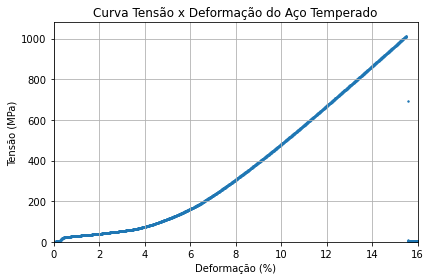

In [147]:
load = np.array(dadosAcoTemp.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosAcoTemp.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=2)
plt.title("Curva Tensão x Deformação do Aço Temperado")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((0,16,0,1080))
plt.grid(True)

In [148]:
#Considerando que de 10 a 12.5% de deformação temos uma região linear de deformação elástica
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>10)&(deformationA<12.5))

In [149]:
# objective function
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])

In [151]:
#print(param)
LimEsc = 1012.5 #Mpa
alonga_final = 15.5 #%
modResiliencia = (LimEsc * alonga_final)/2
#print(modResiliencia)
param[1] + param[0]*14

858.6922358482434

In [172]:
dadosAcoRev = pd.read_csv("açoRev.csv",sep=";")
Area_0 = 49.0167 #mm2
D_0 = 7.90 #mm - Diâmetro
GaugeLength =  50.00 #mm

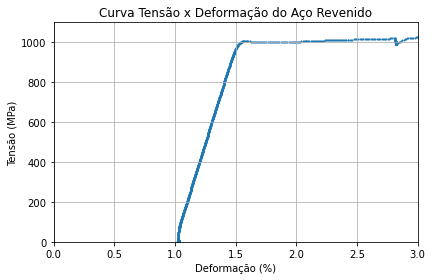

In [195]:
load = np.array(dadosAcoRev.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosAcoRev.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=1)
plt.title("Curva Tensão x Deformação do Aço Revenido")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((0,3,0,1100))
plt.grid(True)

In [169]:
def_plast_final = 1.525
limite_escoamento = 1000
modResiliencia = (def_plast_final*limite_escoamento)/2
modResiliencia

762.5

In [198]:
limResist = 1076.8
along_final = 15.375
modTenacidade = modResiliencia + (31.5)*400 + (2.81-1.525)*1000
modTenacidade

14647.5

In [161]:
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>1.08)&(deformationA<1.5))
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])
param

array([ 1.93930387e+03, -1.92858904e+03,  1.00000000e+00])

In [3]:
dadosAlumSolub = pd.read_csv("AlumSolub.csv",sep=";")
Area_0 = 50.2655 #mm2
D_0 = 8 #mm - Diâmetro
GaugeLength =  50.00 #mm2
dadosAlumSolub.head()

,index,Load(kN),Defor(mm),Stroke(mm),Time(s)
0,0,0.00,0.0,0.000,0.000
1,1,0.00,0.0,0.000,0.055
2,2,0.00,0.0,0.001,0.115
3,3,0.00,0.0,0.001,0.175
4,4,0.02,0.0,0.005,0.235


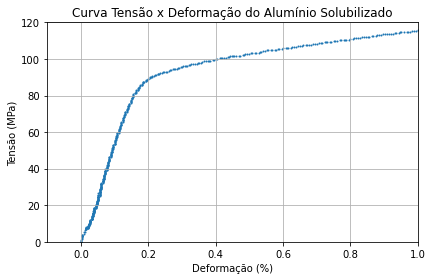

In [9]:
load = np.array(dadosAlumSolub.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosAlumSolub.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=1)
plt.title("Curva Tensão x Deformação do Alumínio Solubilizado")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((-0.1,1,0,120))
plt.grid(True)

In [268]:
limEsc = 90.5
def_elas_final = 0.21
modResiliencia = (limEsc * def_elas_final)/2
modTenac = modResiliencia + (25*5)*(16+8+(0.8*6)+1.2)
modTenac

3759.5025

In [10]:
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>0.05)&(deformationA<0.15))
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])
param

C:\Users\mjuli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([559.70586669,  -2.94083651,   1.        ])

In [11]:
dadosAlumEnvel = pd.read_csv("AlumEnvel.csv",sep=";")
Area_0 = 51.5300 #mm2
D_0 = 8.1 #mm - Diâmetro
GaugeLength =  50.00 #mm2
dadosAlumEnvel.head()

,index,Load(kN),Defor(mm),Stroke(mm),Time(s)
0,0,0.0,0.0,0.000,0.000
1,1,0.0,0.0,0.000,0.055
2,2,0.0,0.0,0.000,0.115
3,3,0.0,0.0,0.000,0.175
4,4,0.0,0.0,0.004,0.235


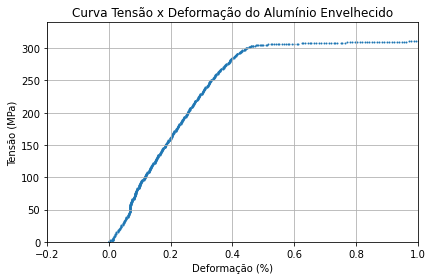

In [14]:
load = np.array(dadosAlumEnvel.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosAlumEnvel.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=1)
plt.title("Curva Tensão x Deformação do Alumínio Envelhecido")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((-0.2,1,0,340))
plt.grid(True)

In [343]:
limEsc = 304.9
def_elas_final = 0.485
modResiliencia = (limEsc * def_elas_final)/2
modTenac = -modResiliencia +(50*2)*(30+9+2+2)
modTenac
modResiliencia

73.93825

In [15]:
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>0.1)&(deformationA<0.3))
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])
param

C:\Users\mjuli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([711.55337866,  18.90005758,   1.        ])

In [467]:
dadosPolim20 = pd.read_csv("Polim20.csv",sep=";")
Area_0 = 18 #mm2
D_0 = 3.00 #mm - Diâmetro
GaugeLength =  25 #mm2
dadosPolim20.head()

,Order,Load(kN),Defor(mm),Stroke(mm),Time(s)
0,0,0.00,0.0000,0.000,0.000
1,1,0.00,0.0000,0.000,0.055
2,2,0.00,0.0162,0.016,0.115
3,3,0.02,0.0362,0.036,0.175
4,4,0.02,0.0562,0.056,0.235


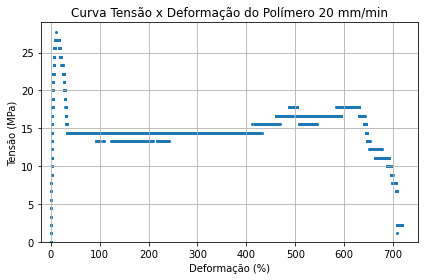

In [468]:
load = np.array(dadosPolim20.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosPolim20.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=4)
plt.title("Curva Tensão x Deformação do Polímero 20 mm/min")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((-20,750,0,29))
plt.grid(True)

In [470]:
modTen = (5*100)*(21)
modTen

10500

In [387]:
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>1)&(deformationA<8.5))
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])
param

array([2.60663934, 6.47100368, 1.        ])

In [452]:
dadosPolim50 = pd.read_csv("Polim50.csv",sep=";")
Area_0 = 18 #mm2
D_0 = 3.00 #mm - Diâmetro
GaugeLength =  25 #mm2
dadosPolim20.head()

,Order,Load(kN),Defor(mm),Stroke(mm),Time(s)
0,0,0.00,0.0000,0.000,0.000
1,1,0.00,0.0000,0.000,0.055
2,2,0.00,0.0162,0.016,0.115
3,3,0.02,0.0362,0.036,0.175
4,4,0.02,0.0562,0.056,0.235


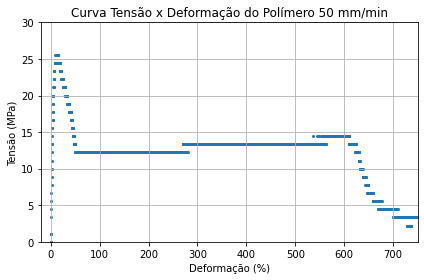

In [463]:
load = np.array(dadosPolim50.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosPolim50.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=4)
plt.title("Curva Tensão x Deformação do Polímero 50 mm/min")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((-20,750,0,30))
plt.grid(True)

In [465]:
modTen = (5*100)*(12+5+0.8)
modTen

8900.0

In [429]:
deformationA = np.array(deformation)
tensionA = np.array(tension)
elastico = np.where((deformationA>1)&(deformationA<8))
def objective(x, a, b, c):
    return a * x + b
param, b = curve_fit(objective, deformationA[elastico], tensionA[elastico])
param

array([2.72610453, 4.878161  , 1.        ])

In [403]:
dadosPolim100 = pd.read_csv("Polim100.csv",sep=";")
Area_0 = 19.6350 #mm2
D_0 = 6.00 #mm - Diâmetro
GaugeLength =  25 #mm2
dadosPolim20.head()

,Order,Load(kN),Defor(mm),Stroke(mm),Time(s)
0,0,0.00,0.0000,0.000,0.000
1,1,0.00,0.0000,0.000,0.055
2,2,0.00,0.0162,0.016,0.115
3,3,0.02,0.0362,0.036,0.175
4,4,0.02,0.0562,0.056,0.235


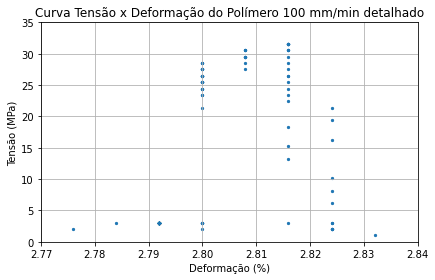

In [406]:
load = np.array(dadosPolim100.iloc[:,1])
tension = (load*1000/(Area_0))     #em tensão MPa
deformation = ((np.array(dadosPolim100.iloc[:,2]))/(GaugeLength))*100   #em porcentagem
plt.scatter(x=deformation,y=tension,s=5)
plt.title("Curva Tensão x Deformação do Polímero 100 mm/min detalhado")
plt.xlabel("Deformação (%)")
plt.ylabel('Tensão (MPa)')
plt.tight_layout()
plt.axis((2.77,2.84,0,35))
plt.grid(True)